## 03 - Generate Hopx MACD Figures
8/26/2025 - Data generated from 16 week KP Hopx-MACD/+ Rosa26-mTmG/+ tumors; data submitted by CHP/EB on 8/5/2024, analyzed by JC 9/4/2024; now integrated and rerun with updated libraries for coherence

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import math
import matplotlib
from matplotlib import pyplot as plt
import scipy

from pathlib import Path
import anndata

In [2]:
from sklearn.linear_model import LogisticRegression
from joblib import dump, load
#names = load('genes.joblib')

In [3]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.family"] = "Arial"
#plt.rcParams['figure.figsize'] = (3,4)

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
np.random.seed(1573)   #fix so we can reproduce later

In [5]:
Path("./figures/").mkdir(parents=True, exist_ok=True) # generate figures here
#Path("./figures/umapfigures").mkdir(parents=True, exist_ok=True) # generate figures here
#Path("./figures/violinfigures").mkdir(parents=True, exist_ok=True) # generate figures here
Path("./write").mkdir(parents=True, exist_ok=True) # write h5ad here

## Load Tumor Cell Data

In [6]:
adata = sc.read('write/combined_data.h5ad')

In [8]:
adata.obs[['batch','Group']].value_counts()

batch             Group             
depletion         Saline                10660
Hopx-MACD         Hopx_GFP+mScarlet+     5660
                  Hopx_GFP+mScarlet-     4846
untraced_14wk     KPT                    1903
Hopx-MACD_traced  Hopx_12wk3d            1226
traced            14wk                    991
Hopx-MACD_traced  Hopx_12wk14d            911
traced            12wk_3d                 877
                  8wk                     742
                  6wk_3d                  586
Name: count, dtype: int64

## Select Hopx-MACD untraced mice

In [9]:
adata = adata[adata.obs.batch == 'Hopx-MACD',:]

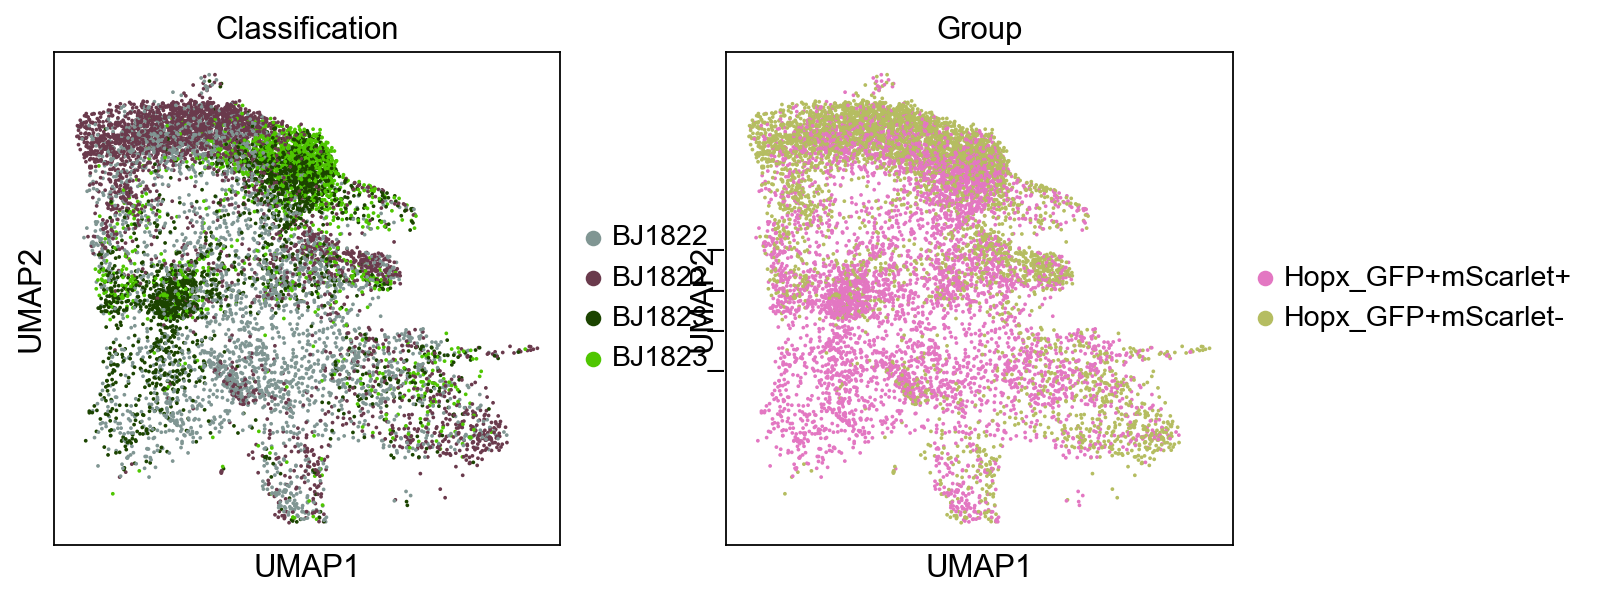

In [11]:
sc.pl.umap(adata, color=['Classification','Group'])

## Figures for the paper

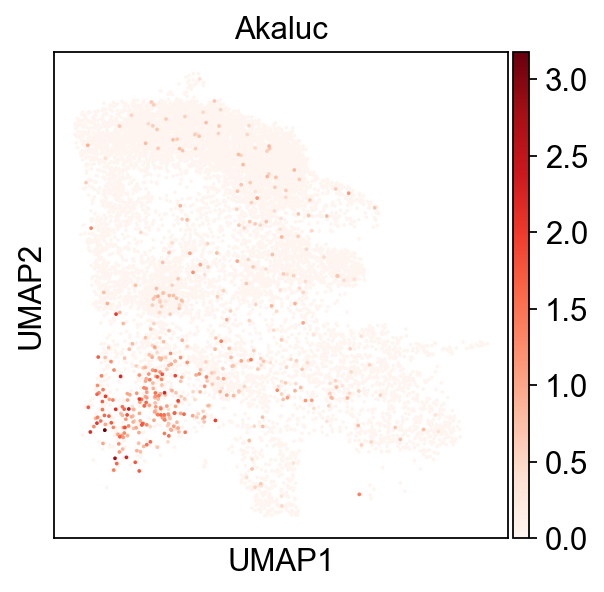

In [13]:
sc.pl.umap(adata, color='Akaluc',cmap="Reds", save="figures/Ext_Fig_8i_Akaluc.svg")

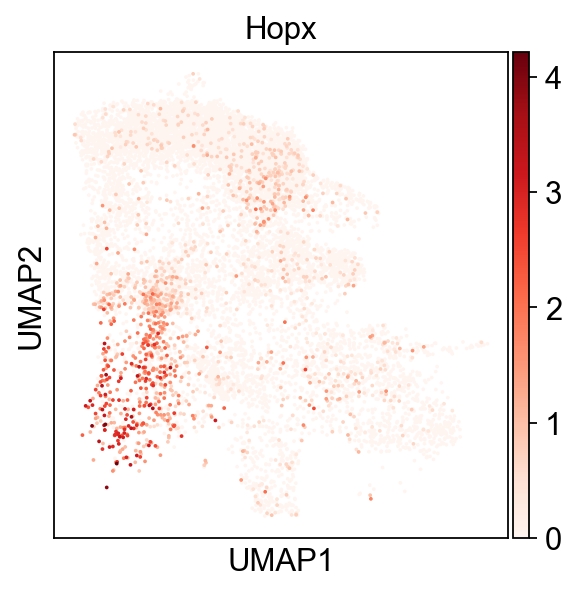

In [14]:
sc.pl.umap(adata, color='Hopx',cmap="Reds", save="figures/Ext_Fig_8i_Hopx.svg")

In [15]:
oldorder = adata.obs['Classification'].cat.categories
oldorder

Index(['BJ1822_B0301', 'BJ1822_B0305', 'BJ1823_B0302', 'BJ1823_B0306'], dtype='object')

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_28464/807690026.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Classification'] = adata.obs['Classification'].astype(pd.CategoricalDtype(categories=['BJ1822_B0301', 'BJ1823_B0302', 'BJ1822_B0305','BJ1823_B0306','BJ1187_B0303', 'BJ1187_B0308', 'BJ1192_B0304', 'BJ1192_B0310'], ordered=True))


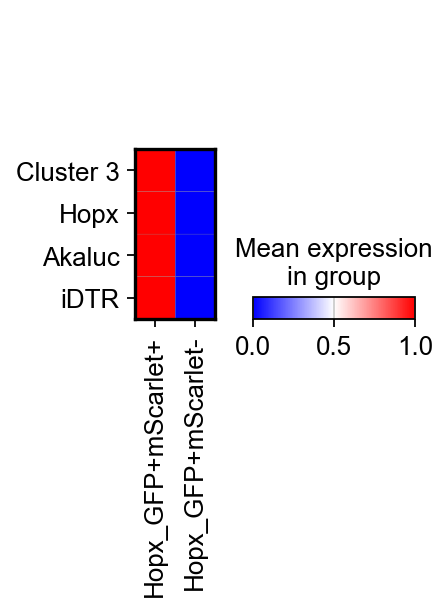

In [16]:
# Here Cluster 3 = AT1-like cell state
adata.obs['Classification'] = adata.obs['Classification'].astype(pd.CategoricalDtype(categories=['BJ1822_B0301', 'BJ1823_B0302', 'BJ1822_B0305','BJ1823_B0306','BJ1187_B0303', 'BJ1187_B0308', 'BJ1192_B0304', 'BJ1192_B0310'], ordered=True))
sc.pl.matrixplot(adata[adata.obs.Group.isin(['Hopx_GFP+mScarlet-','Hopx_GFP+mScarlet+']),:], ['Cluster 3','Hopx','Akaluc','iDTR'],'Group',cmap='bwr',swap_axes=True,standard_scale='var',save='Ext_Fig_8j_matrixplot_groupscaled.svg')

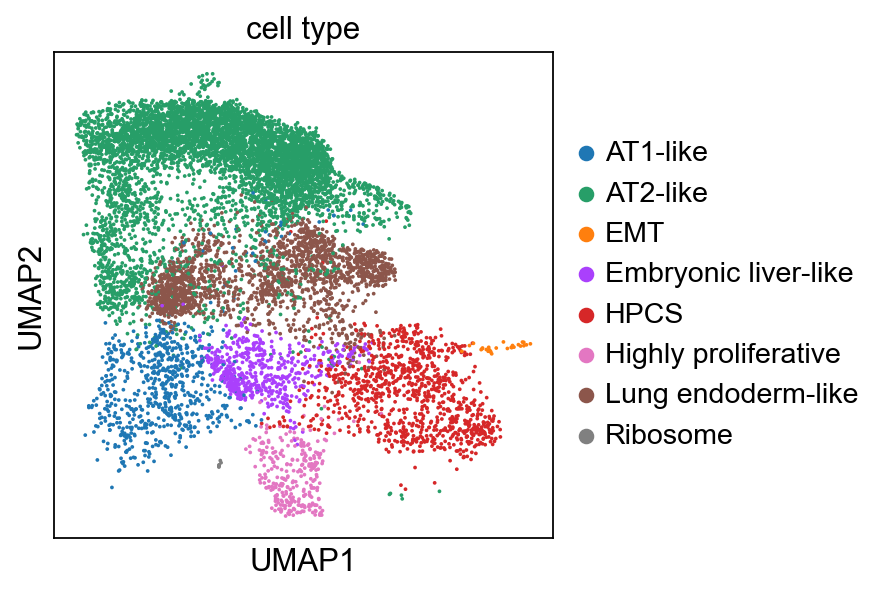

In [17]:
sc.pl.umap(adata, color=['cell type'], cmap='Reds', save='Ext_Fig_8h_cell type.svg')